## 1

Численное решение уравнения теплопроводности методом Басси-Рибэй (II). Уравнение имеет вид: 

$\begin {cases}
    {\frac{\partial u}{\partial t} - D\frac {\partial^2 u}{\partial^2 x} = f(x)} \ \\
    {u(x,0) = u_0(x)} \ \\
    {u(x_{left},t) = u(x_{right}, t) = u_1(t),\ x \in [x_{left}, x_{right} ]
\end {cases}$

В нашем случае уравнение имеет вид:

$\begin {cases}
    \frac{\partial u}{\partial t} - \frac {\partial^2 u}{\partial^2 x} = f(x), \ \\
    
    u(x,0) = \sin (x),\ \\
    
    u(0,t) = u(2\pi, t) = 0,\ x \in [0, 2 \pi ]
\end {cases}$

Надо найти функцию u(x, T), где T - некоторый момент времени

## 2

Метод Басси-Рибей заключается в том, что численное решение дробится на два шага. На первом шаге вычисляется $ \frac {\partial u}{\partial x}$ в каждой точке пространства, а потом ищется решение уравнения переноса
$\\ \frac {\partial u}{\partial t} - \frac {\partial q}{\partial x} = f(x), \\ $
где $q(x) = \frac{\partial u}{\partial x}(x, \tau), \ \tau$ - временной слой, на котором ищется решение. Более подробно в коспектах

j - номер пространственной ячейки, k - номер итерации, i,l - элемент разложения в базис

Представсляем наше уравнение как:

$\begin{cases}
    {u_t - q_x = 0 \ (A)} \\
    {q - u_x = 0 \ \ (B)}
\end{cases}$

Интегрируем полученное уравнение по контуру ячейки в пространстве времени $(x_j-h/2, t_k) \to (x_j+h/2, t_k)
\to (x_j + h/2,t_{k+1}) \to (x_j-h/2, t_{k+1}) \to (x_j-h/2, t_k)$

Раскладывая u по базису $\phi_i = [1, \frac {x-x_0}{h}, \frac {(x-x0)^2} {h^2}]^T$ Получаем в каждой ячейке следующие соотношения: 

$(A) \int u^{(j,i)}_t \phi^{(i)} dx + \int q^{(j)} \phi^{(i)}_x dx - \hat q_j \left.\phi^{(i)}\right |_{x_j-h/2}^{x_j+h/2} = 0 \\
\hat q_j \left. \phi^{(i)} \right |_{x_j-h/2}^{x_j+h/2} = \hat q_j \left.\phi^{(i)}\right |_-^+ = \hat q^+_j \phi^{(i)}_+ - \hat q^-_j \phi^{(i)}_- -\ значения\ на\ границах\ ячейки
$

Разложим q по тому же базису: $q = \sum q^{(i)} \phi^{(i)} \\
\int q^{(j,i)} \phi^{(i)} dx + \int u^{(j)} \phi^{(i)}_x dx - \hat u_j \left.\phi^{(i)}\right |_-^+ = 0 \\
q^{(j,l)} \int \phi^{(i)} \phi^{(l)} dx + u^{(j,i)}\int \phi^{(i)}\phi_x^{(l)} dx - \hat u_j \left.\phi^{(i)}\right |_-^+ = 0
$

$
M_{ij} = \int \phi^{(i)} \phi^{(j)} dx\ -\ массовая\ матрица \\
M_1^{ij} = \int \phi^{(i)}\phi_x^{(j)} dx
$



Теперь можно выразить q и u:

$
\vec q^{(j, k+1)} = M^{-1}\left[ \hat u_{j,k}^+ \vec\phi - \hat u_{j,k}^- \vec\phi - M_1 \vec u^{(j,k)} \right] \\
\vec u^{(j, k+1)} = \vec u^{(j,k)} - \tau M_{-1}\left(M_1 \vec q^{(j,k+1)} - \left(\hat q^+_j - \hat q^-_j\right)\vec \phi^{(j)} \right)
$

Значения q и u на границах берём следующим образом: значения q на границу приходят слева, а значения u на границу приходят справа (либо наоборот), то есть - 

$\hat q^+_j = \displaystyle\lim_{x \to x_j + h/2} \vec q_j \vec \phi_j(x) \\
\hat q^-_j = \displaystyle\lim_{x \to x_{j-1} + h/2} \vec q_{j-1} \vec \phi_{j-1}(x) \\
\hat u^+_j = \displaystyle\lim_{x \to x_{j+1} - h/2} \vec u_{j+1} \vec \phi_{j+1}(x) \\
\hat u^-_j = \displaystyle\lim_{x \to x_{j} + h/2} \vec u_{j} \vec \phi_j(x)
$

(В коде значения u приходят слева, а q - справа)

## 3

На возможность разрешить уравнения. Если НУ неразрывны, то и решение будет неразрывным.
Также, начальные условия явно входят в решение уравнения, например у заданного уравнения точное решение будет $u(x,t) = e^{-t} \cdot \sin(x)$

## 4

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ans = pd.read_csv('ans.txt', delimiter=';')

Восстановим решение как $u_{add} = \vec u_i \cdot \vec \phi_i (x), u_0 -$ найденное разложение скорости в центре ячейки, $\phi_i = [1, \frac {x-x_0}{h}, \frac {(x-x0)^2} {h^2}]^T$ - базис. Будем искать дополнительные значения скоростей в точках $x_i + h/4, $ базис примет вид $\phi_i = [1, \frac 1 4, \frac 1 {16}]^T$

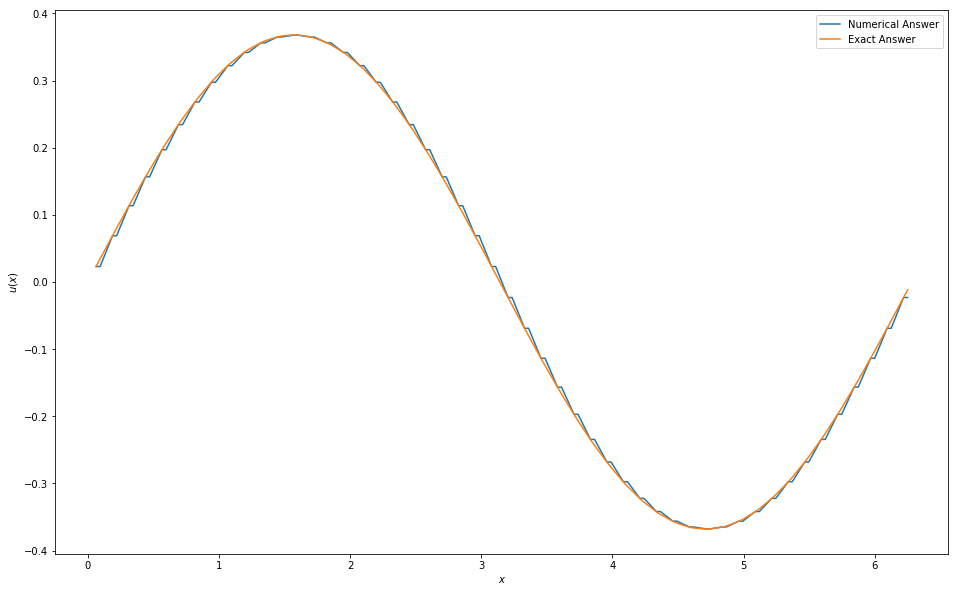

In [5]:
plt.figure(figsize=(16, 10))
plt.plot(ans.X, ans.Vel, label='Numerical Answer')
plt.plot(ans.X, ans.Exact, label='Exact Answer')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.show()

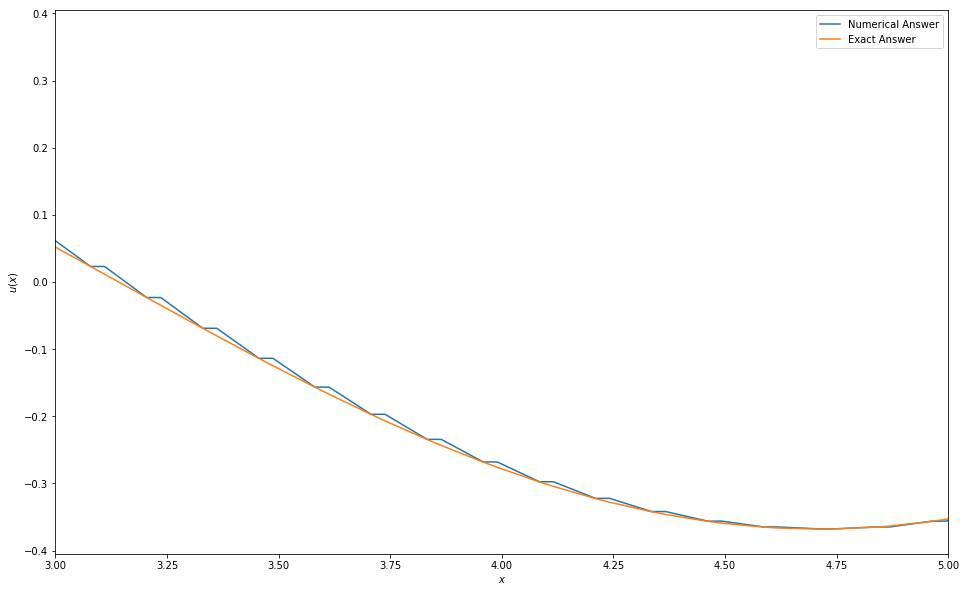

In [6]:
plt.figure(figsize=(16, 10))
plt.plot(ans.X, ans.Vel, label='Numerical Answer')
plt.plot(ans.X, ans.Exact, label='Exact Answer')
plt.legend()
plt.xlim(3, 5)
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.show()

Решение получается таким, так как внутри ячейчки мы аппроксимируем полиномом третьей степени, которого недостаточно для аппроксимации синуса.

## 6

Потому, что если напрямую моделировать вторую производную на том же шаблоне, мы теряем точность.